##Document Image classification using Sequential CNN, VGG16 and ResNet


##Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


##Dataset Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/final/train")
data_dir1 = pathlib.Path("/content/drive/MyDrive/final/test")
#data_dir = pathlib.Path("/content/drive/MyDrive/final_latest/train")
#data_dir1 = pathlib.Path("/content/drive/MyDrive/final_latest/test")

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4319


In [ ]:
image_count = len(list(data_dir1.glob('*/*.jpg')))
print(image_count)

480


In [ ]:
batch_size = 64
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4319 files belonging to 16 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 480 files belonging to 16 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['advertisement', 'budget', 'email', 'file_folder', 'form', 'handwritten', 'invoice', 'letter', 'memo', 'news_article', 'presentation', 'questionnaire', 'resume', 'scientific_publication', 'scientific_report', 'specification']


###Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##Sequential CNN Model

In [ ]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 5, strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Conv2D(32, 5,strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Conv2D(64, 5,strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        5

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
68/68 [==============================] - 777s 1s/step - loss: 2.6787 - accuracy: 0.1480 - val_loss: 2.4462 - val_accuracy: 0.2729
Epoch 2/20
68/68 [==============================] - 5s 76ms/step - loss: 2.1208 - accuracy: 0.3644 - val_loss: 2.0518 - val_accuracy: 0.3542
Epoch 3/20
68/68 [==============================] - 5s 77ms/step - loss: 1.7423 - accuracy: 0.4814 - val_loss: 1.9324 - val_accuracy: 0.4125
Epoch 4/20
68/68 [==============================] - 5s 76ms/step - loss: 1.4349 - accuracy: 0.5622 - val_loss: 1.8624 - val_accuracy: 0.4604
Epoch 5/20
68/68 [==============================] - 5s 77ms/step - loss: 1.1374 - accuracy: 0.6543 - val_loss: 1.9229 - val_accuracy: 0.4646
Epoch 6/20
68/68 [==============================] - 5s 76ms/step - loss: 0.8194 - accuracy: 0.7509 - val_loss: 2.0231 - val_accuracy: 0.4292
Epoch 7/20
68/68 [==============================] - 5s 76ms/step - loss: 0.5383 - accuracy: 0.8370 - val_loss: 2.4071 - val_accuracy: 0.4708
Epoch 8/20
68

In [ ]:
output = model.predict(train_ds)

In [ ]:
output.shape, 

((4319, 16),)

In [ ]:
class_names

['advertisement',
 'budget',
 'email',
 'file_folder',
 'form',
 'handwritten',
 'invoice',
 'letter',
 'memo',
 'news_article',
 'presentation',
 'questionnaire',
 'resume',
 'scientific_publication',
 'scientific_report',
 'specification']

In [ ]:
output[0]

array([  8.598928  ,   8.345175  ,  -7.509324  ,   2.3155274 ,
        11.918311  ,  -0.05459381,   1.979688  , -16.064173  ,
        -6.5152736 ,  23.954662  ,   4.50826   ,   6.5646324 ,
        -2.949666  ,   7.2045193 ,   0.22256361,  -3.852771  ],
      dtype=float32)

In [ ]:
for image, label in train_ds.take(1):
  for i in range(15):
    print(class_names[label[i]])

scientific_report
news_article
handwritten
letter
email
invoice
resume
advertisement
letter
scientific_report
advertisement
presentation
letter
letter
scientific_publication


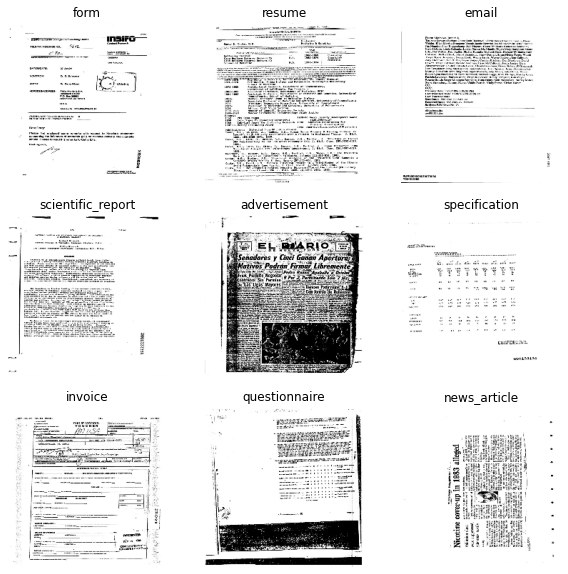

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

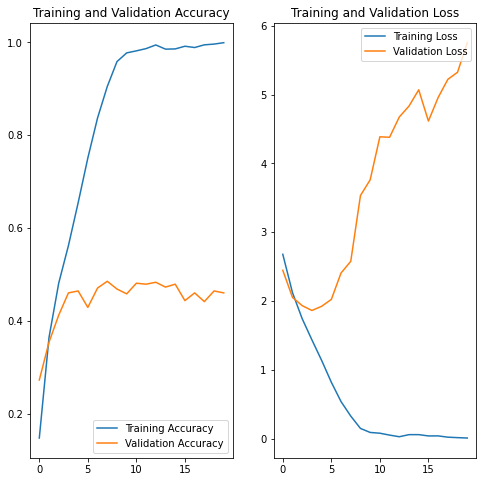

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
68/68 [==============================] - 7s 72ms/step - loss: 2.7186 - accuracy: 0.1313 - val_loss: 3.1325 - val_accuracy: 0.1187
Epoch 2/15
68/68 [==============================] - 4s 65ms/step - loss: 2.4071 - accuracy: 0.2345 - val_loss: 2.4770 - val_accuracy: 0.2688
Epoch 3/15
68/68 [==============================] - 4s 64ms/step - loss: 2.2189 - accuracy: 0.3098 - val_loss: 2.5014 - val_accuracy: 0.2729
Epoch 4/15
68/68 [==============================] - 4s 64ms/step - loss: 2.0994 - accuracy: 0.3406 - val_loss: 2.2268 - val_accuracy: 0.3542
Epoch 5/15
68/68 [==============================] - 4s 66ms/step - loss: 1.9640 - accuracy: 0.3922 - val_loss: 2.1951 - val_accuracy: 0.3833
Epoch 6/15
68/68 [==============================] - 4s 64ms/step - loss: 1.8705 - accuracy: 0.4223 - val_loss: 2.1404 - val_accuracy: 0.3792
Epoch 7/15
68/68 [==============================] - 4s 64ms/step - loss: 1.8014 - accuracy: 0.4397 - val_loss: 2.0323 - val_accuracy: 0.3979
Epoch 8/15
68

Dropout

In [ ]:
model = Sequential([
                    data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [ ]:
epochs = 60
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/60
68/68 [==============================] - 5s 66ms/step - loss: 2.7803 - accuracy: 0.1165 - val_loss: 3.0916 - val_accuracy: 0.1146
Epoch 2/60
68/68 [==============================] - 4s 64ms/step - loss: 2.4515 - accuracy: 0.2172 - val_loss: 3.5310 - val_accuracy: 0.1875
Epoch 3/60
68/68 [==============================] - 4s 64ms/step - loss: 2.2726 - accuracy: 0.2850 - val_loss: 3.1274 - val_accuracy: 0.2000
Epoch 4/60
68/68 [==============================] - 4s 64ms/step - loss: 2.2056 - accuracy: 0.2982 - val_loss: 2.5071 - val_accuracy: 0.2854
Epoch 5/60
68/68 [==============================] - 4s 64ms/step - loss: 2.1260 - accuracy: 0.3360 - val_loss: 2.5795 - val_accuracy: 0.3021
Epoch 6/60
68/68 [==============================] - 4s 65ms/step - loss: 2.0785 - accuracy: 0.3473 - val_loss: 2.4365 - val_accuracy: 0.2958
Epoch 7/60
68/68 [==============================] - 4s 65ms/step - loss: 2.0556 - accuracy: 0.3630 - val_loss: 2.6298 - val_accuracy: 0.2937
Epoch 8/60
68

##VGG16 Model

In [ ]:
pre_trained_model_vgg = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layers in pre_trained_model_vgg.layers:
  layers.trainable= False

In [ ]:
from keras.layers import Input, Lambda, Dense,Flatten
x=Flatten()(pre_trained_model_vgg.output)

In [ ]:

prediction = Dense(16, activation='softmax')(x)

In [ ]:
from keras.models import Model
model = Model(inputs=pre_trained_model_vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(data_dir1,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4319 images belonging to 16 classes.
Found 480 images belonging to 16 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
135/135 [==============================] - 120s 849ms/step - loss: 2.0005 - accuracy: 0.4140 - val_loss: 1.6348 - val_accuracy: 0.5021
Epoch 2/15
135/135 [==============================] - 104s 773ms/step - loss: 1.4520 - accuracy: 0.5668 - val_loss: 1.7125 - val_accuracy: 0.5417
Epoch 3/15
135/135 [==============================] - 105s 780ms/step - loss: 1.2972 - accuracy: 0.6078 - val_loss: 1.5738 - val_accuracy: 0.5458
Epoch 4/15
135/135 [==============================] - 105s 778ms/step - loss: 1.1487 - accuracy: 0.6506 - val_loss: 1.6067 - val_accuracy: 0.5479
Epoch 5/15
135/135 [==============================] - 105s 778ms/step - loss: 1.0941 - accuracy: 0.6643 - val_loss: 1.5812 - val_accuracy: 0.5771
Epoch 6/15
135/135 [==============================] - 105s 780ms/step - loss: 1.0378 - accuracy: 0.6890 - val_loss: 1.4335 - val_accuracy: 0.6146
Epoch 7/15
135/135 [==============================] - 105s 778ms/step - loss: 0.9346 - accuracy: 0.7141 - val_loss: 1.6315 -

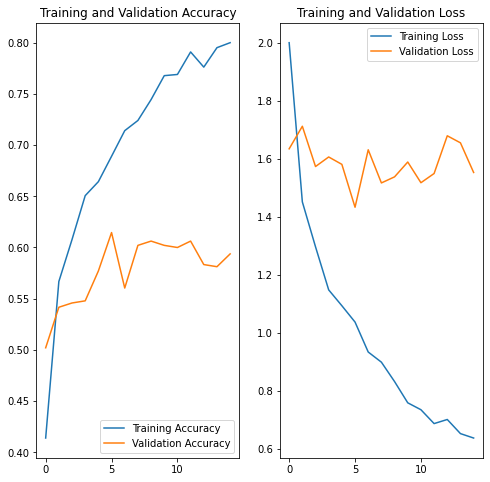

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


##ResNet

In [ ]:
Model_ResNet = ResNet50(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
for layers in Model_ResNet.layers:
  layers.trainable= False

In [ ]:
from keras.layers import Input, Lambda, Dense,Flatten
x=Flatten()(Model_ResNet.output)

In [ ]:
prediction_resnet = Dense(16, activation='softmax')(x)

In [ ]:
from keras.models import Model
model_res = Model(inputs=Model_ResNet.input, outputs=prediction_resnet)

In [ ]:
model_res.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model_res.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model_res.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
135/135 [==============================] - 109s 783ms/step - loss: 5.3191 - accuracy: 0.2077 - val_loss: 3.5608 - val_accuracy: 0.2542
Epoch 2/30
135/135 [==============================] - 105s 774ms/step - loss: 2.9783 - accuracy: 0.2767 - val_loss: 3.5435 - val_accuracy: 0.2271
Epoch 3/30
135/135 [==============================] - 105s 775ms/step - loss: 3.2760 - accuracy: 0.2954 - val_loss: 2.9445 - val_accuracy: 0.3292
Epoch 4/30
135/135 [==============================] - 104s 773ms/step - loss: 2.9667 - accuracy: 0.3269 - val_loss: 3.1369 - val_accuracy: 0.3271
Epoch 5/30
135/135 [==============================] - 104s 773ms/step - loss: 2.9664 - accuracy: 0.3417 - val_loss: 2.8705 - val_accuracy: 0.3708
Epoch 6/30
135/135 [==============================] - 104s 772ms/step - loss: 2.8299 - accuracy: 0.3630 - val_loss: 3.1128 - val_accuracy: 0.3375
Epoch 7/30
135/135 [==============================] - 104s 774ms/step - loss: 2.6651 - accuracy: 0.3864 - val_loss: 3.5158 -